In [92]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
team_stats = pd.read_csv("champion trophy teams stats.csv")
r = pd.read_csv("matchresults_since2015.csv")
schedule = pd.read_csv("ICCchampionstrophyschedule.csv")
player_stats = pd.read_csv("ChampionstrophyPlayers_ODIstats.csv")
icc_rankings = pd.read_csv("Icc_ranking.csv")
last_10_stats = pd.read_csv("last10_odi stats.csv")




# DATA VISUALIZATION

Extracting the details like number of wins,losses,tie,no result details of each team and extracting the data of head to head stats between the teams involved in champions trophy from matchresults_since2015.csv

In [94]:
# list of champions trophy teams
champions_trophy_teams = [
    "India", "Australia", "Pakistan", "South Africa",
    "New Zealand", "England", "Bangladesh", "Afghanistan"
]
# Filtering results with only teams in champions trophy
filtered_results = r[
    (r['Team_A'].isin(champions_trophy_teams)) &
    (r['Team_B'].isin(champions_trophy_teams))
]

In [95]:
# Calculate win, loss, tie, and no result counts for each team
stats = {team: {'Wins': 0, 'Losses': 0, 'Ties': 0, 'No Results': 0} for team in champions_trophy_teams}
for _, row in filtered_results.iterrows():
    winner = row['Winner']
    if winner in champions_trophy_teams:
        stats[winner]['Wins'] += 1
    if row['Team_A'] in champions_trophy_teams and row['Team_B'] in champions_trophy_teams:
        if winner == row['Team_A']:
            stats[row['Team_B']]['Losses'] += 1
        elif winner == row['Team_B']:
            stats[row['Team_A']]['Losses'] += 1
        elif winner == 'Tie':
            stats[row['Team_A']]['Ties'] += 1
            stats[row['Team_B']]['Ties'] += 1
        elif winner == 'Noresult':
            stats[row['Team_A']]['No Results'] += 1
            stats[row['Team_B']]['No Results'] += 1
team_stats_df = pd.DataFrame.from_dict(stats, orient='index')

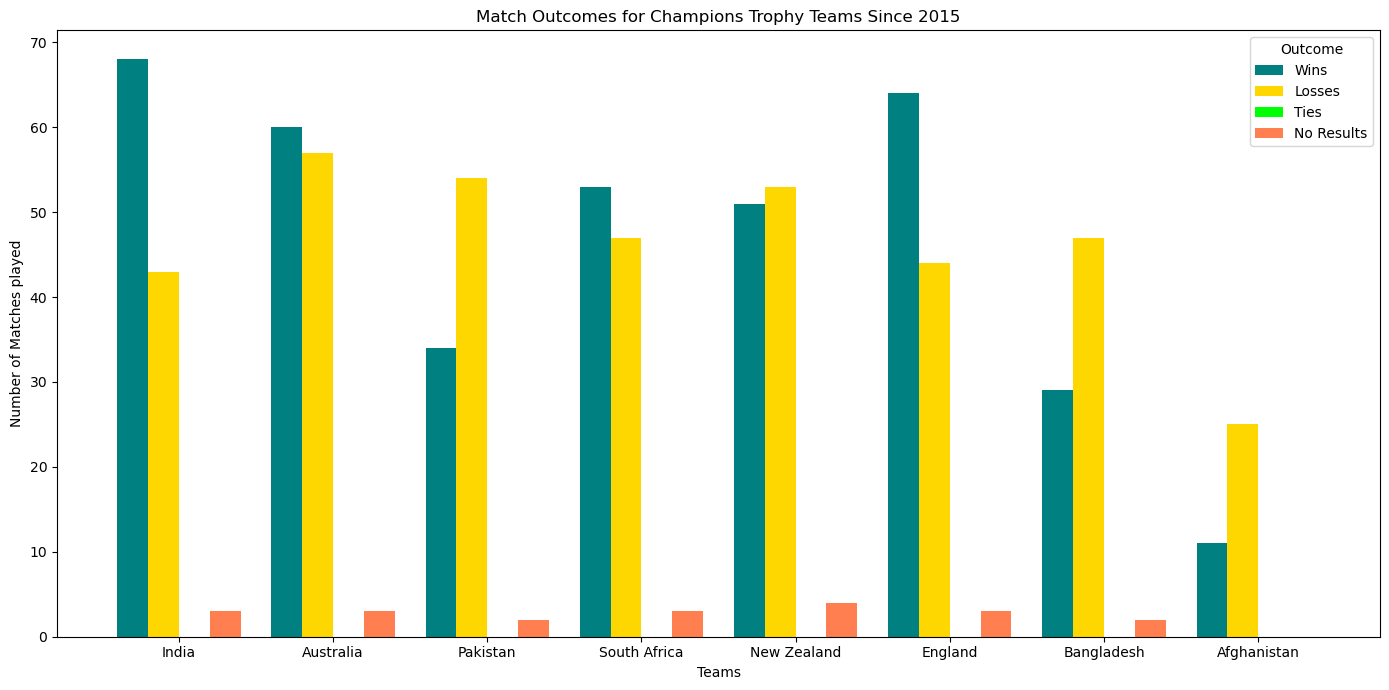

In [96]:
coloumns = ['Wins', 'Losses', 'Ties', 'No Results']
x = np.arange(len(champions_trophy_teams))
width = 0.2

wins = [stats[team]['Wins'] for team in champions_trophy_teams]
losses = [stats[team]['Losses'] for team in champions_trophy_teams]
ties = [stats[team]['Ties'] for team in champions_trophy_teams]
no_results = [stats[team]['No Results'] for team in champions_trophy_teams]

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - 1.5 * width, wins, width, color='teal', label='Wins')
bars2 = ax.bar(x - 0.5 * width, losses, width, color='gold', label='Losses')
bars3 = ax.bar(x + 0.5 * width, ties, width, color='lime', label='Ties')
bars4 = ax.bar(x + 1.5 * width, no_results, width, color='coral', label='No Results')

# Add labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Number of Matches played')
ax.set_title('Match Outcomes for Champions Trophy Teams Since 2015')
ax.set_xticks(x)
ax.set_xticklabels(champions_trophy_teams)
ax.legend(title="Outcome")
plt.tight_layout()
plt.show()

In [97]:
# Create a function to compute head-to-head stats for a specific team
def compute_head_to_head_stats(team, results, opponent_teams):
    # Filter matches involving the given team and opponents
    team_results = results[
        (results['Team_A'] == team) | (results['Team_B'] == team)
    ]

    # Initialize stats for opponents
    head_to_head = {opponent: {'Wins': 0, 'Losses': 0, 'Ties': 0, 'No Results': 0}
                    for opponent in opponent_teams if opponent != team}

    # Calculate stats for each opponent
    for _, row in team_results.iterrows():
        opponent = row['Team_B'] if row['Team_A'] == team else row['Team_A']
        if opponent in opponent_teams:
            winner = row['Winner']
            if winner == team:
                head_to_head[opponent]['Wins'] += 1
            elif winner == opponent:
                head_to_head[opponent]['Losses'] += 1
            elif winner == 'Tie':
                head_to_head[opponent]['Ties'] += 1
            elif winner == 'Noresult':
                head_to_head[opponent]['No Results'] += 1

    return pd.DataFrame.from_dict(head_to_head, orient='index')

# Compute and display head-to-head stats for each Champions Trophy team
head_to_head_stats = {}

for team in champions_trophy_teams:
    stats1 = compute_head_to_head_stats(team, filtered_results, champions_trophy_teams)
    head_to_head_stats[team] = stats1

# Displaying head-to-head stats for India as an example
print(head_to_head_stats['India'])


              Wins  Losses  Ties  No Results
Australia       17      14     0           0
Pakistan         6       1     0           1
South Africa    14       8     0           0
New Zealand     14       9     0           2
England          8       6     0           0
Bangladesh       7       5     0           0
Afghanistan      2       0     0           0


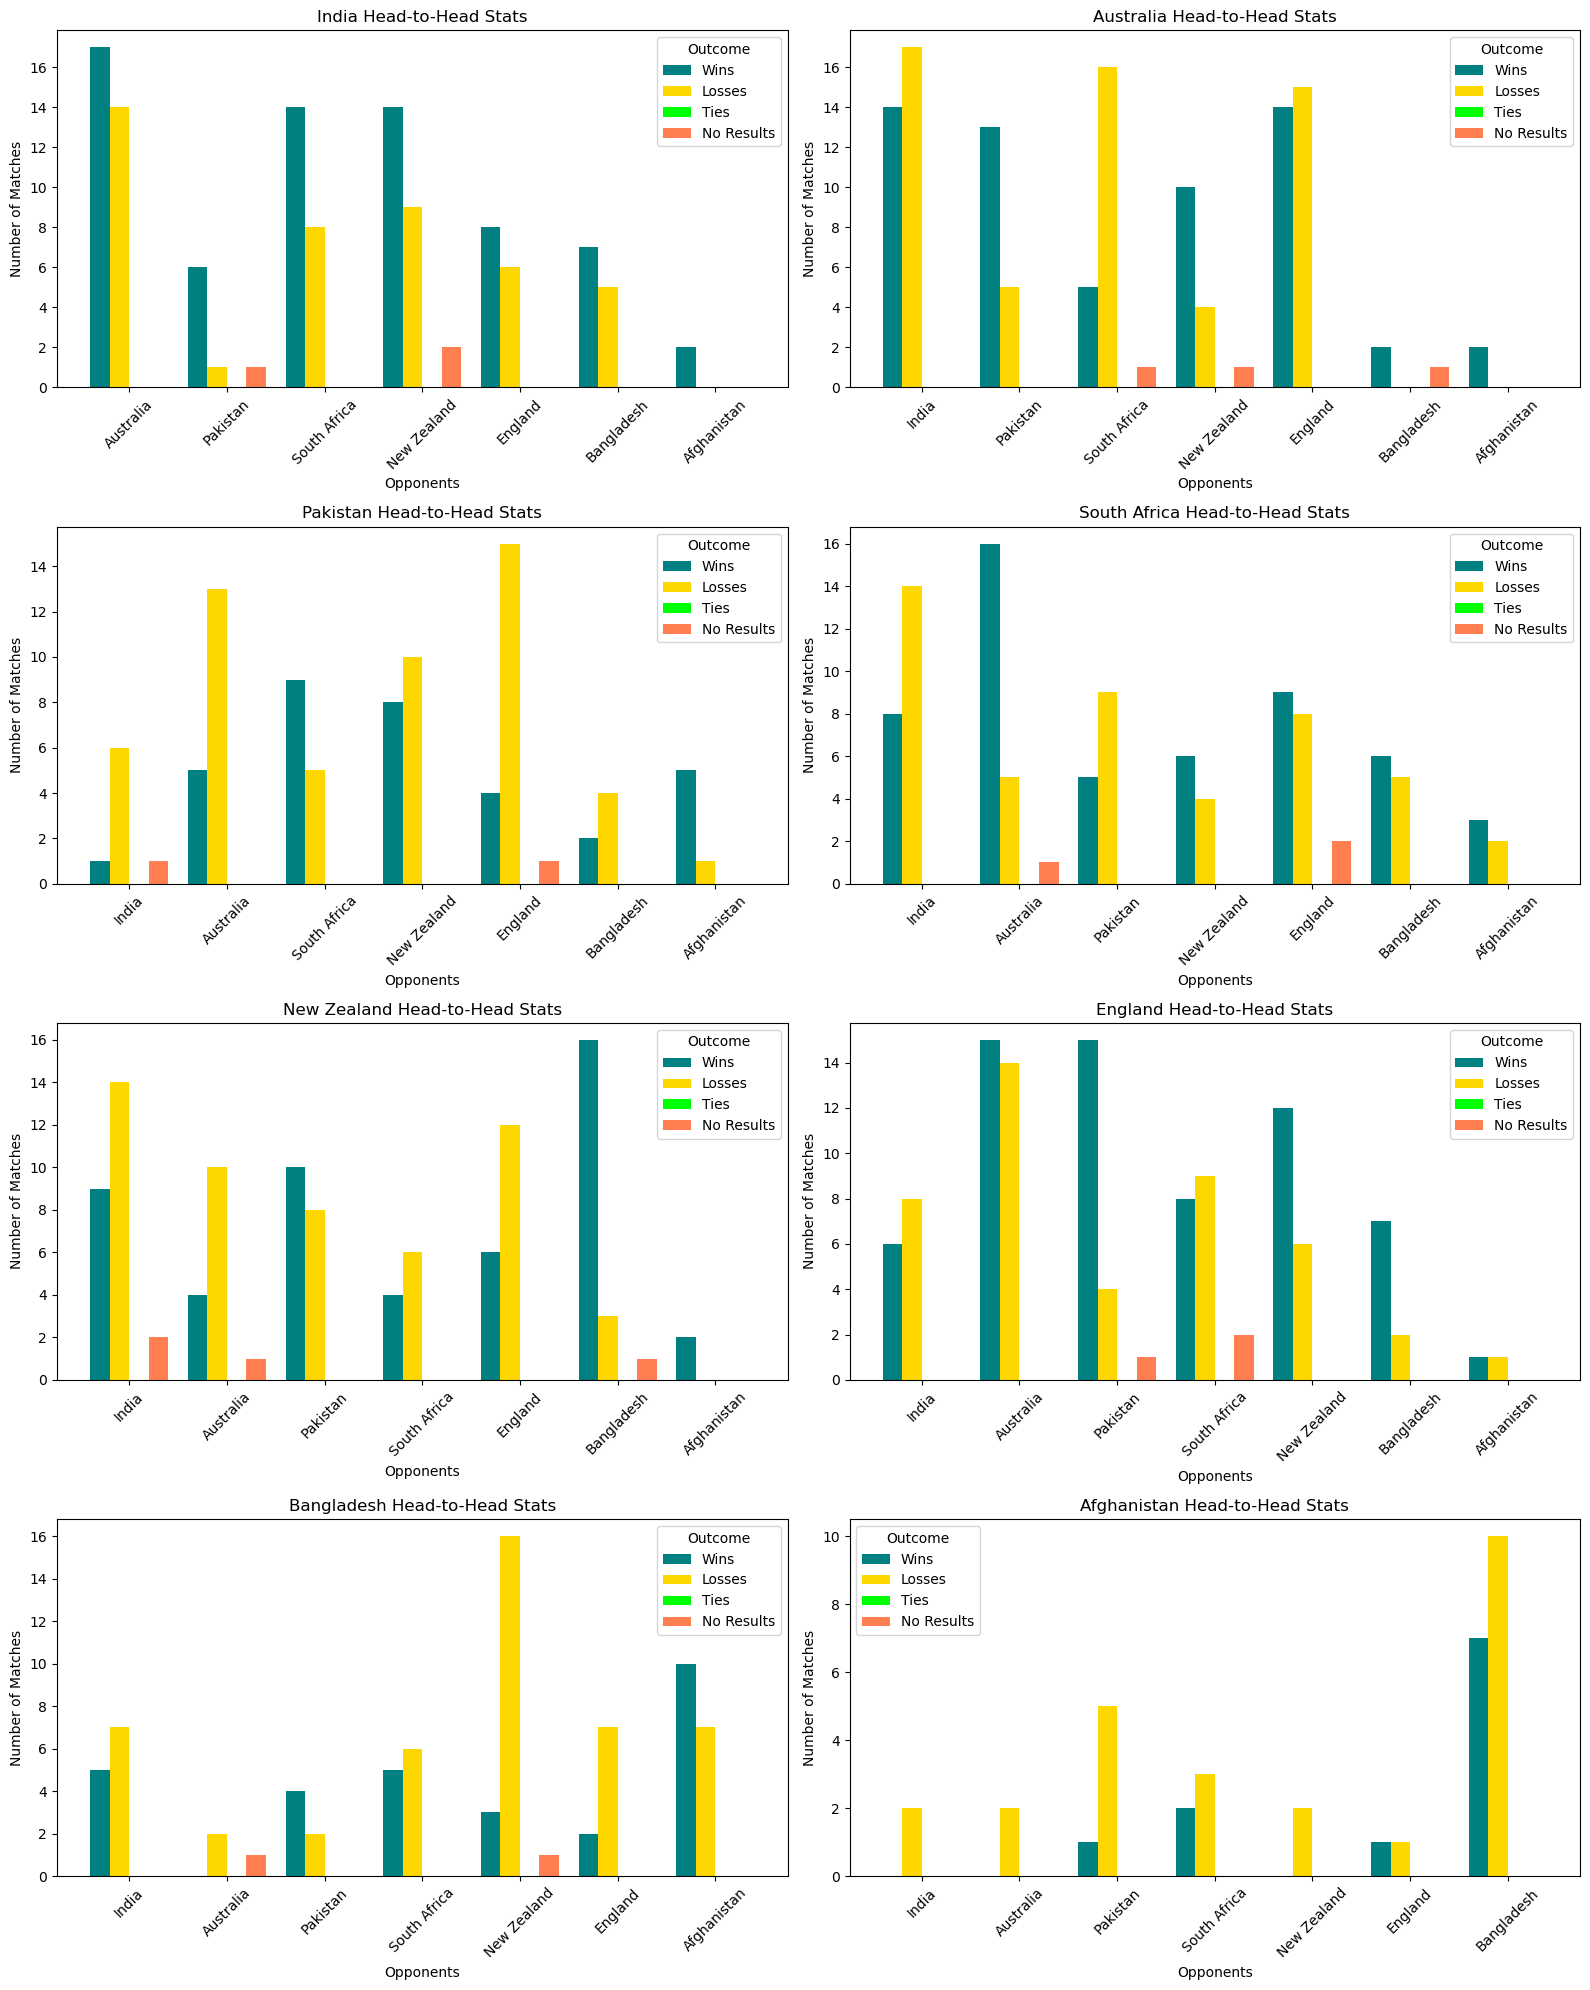

In [100]:
# Visualize head-to-head stats for all teams with distinct colors for each outcome
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, team in enumerate(champions_trophy_teams):
    stats1 = head_to_head_stats[team]
    x = np.arange(len(stats1.index))  # Opponent indices
    width = 0.2  # Width of each bar
    
    # Data for each category
    wins = stats1['Wins']
    losses = stats1['Losses']
    ties = stats1['Ties']
    no_results = stats1['No Results']
    
    # Plot grouped bar chart
    axes[i].bar(x - 1.5 * width, wins, width, color='teal', label='Wins')
    axes[i].bar(x - 0.5 * width, losses, width, color='gold', label='Losses')
    axes[i].bar(x + 0.5 * width, ties, width, color='lime', label='Ties')
    axes[i].bar(x + 1.5 * width, no_results, width, color='coral', label='No Results')
    
    # Add titles and labels
    axes[i].set_title(f"{team} Head-to-Head Stats")
    axes[i].set_xlabel("Opponents")
    axes[i].set_ylabel("Number of Matches")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(stats1.index, rotation=45)
    axes[i].legend(title="Outcome")

plt.tight_layout()
plt.show()

Visualizing champions trophy playing teams stats

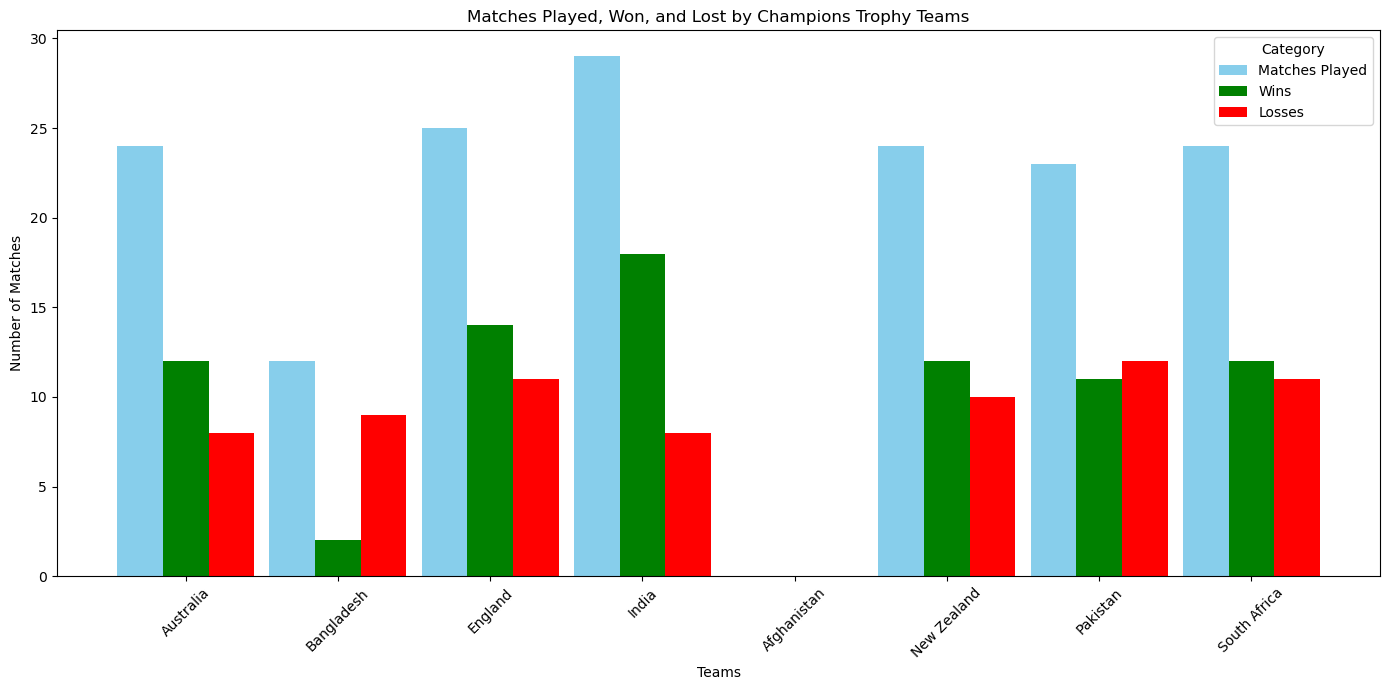

In [101]:
teams = team_stats['Team']
matches_played = team_stats['Mat']
wins = team_stats['Wins']
losses = team_stats['Losses']
win_percentages = team_stats['Win_Percentage']
x = np.arange(len(teams))  # Team indices
width = 0.3  # Width of each bar

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width, matches_played, width, color='skyblue', label='Matches Played')
bars2 = ax.bar(x, wins, width, color='green', label='Wins')
bars3 = ax.bar(x + width, losses, width, color='red', label='Losses')

# Add labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Number of Matches')
ax.set_title('Matches Played, Won, and Lost by Champions Trophy Teams')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45)
ax.legend(title="Category")

plt.tight_layout()
plt.show()

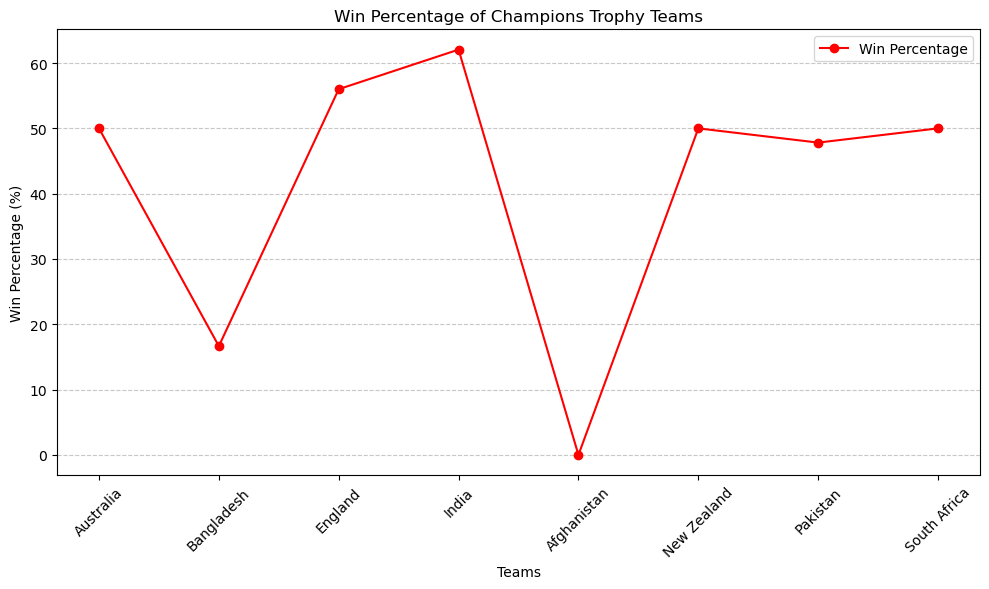

In [102]:
# plotting win percentage of each teams in line plot
plt.figure(figsize=(10, 6))
plt.plot(team_stats['Team'], team_stats['Win_Percentage'], marker='o', linestyle='-', color='red', label='Win Percentage')
plt.title('Win Percentage of Champions Trophy Teams')
plt.xlabel('Teams')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Visualizing player level stats

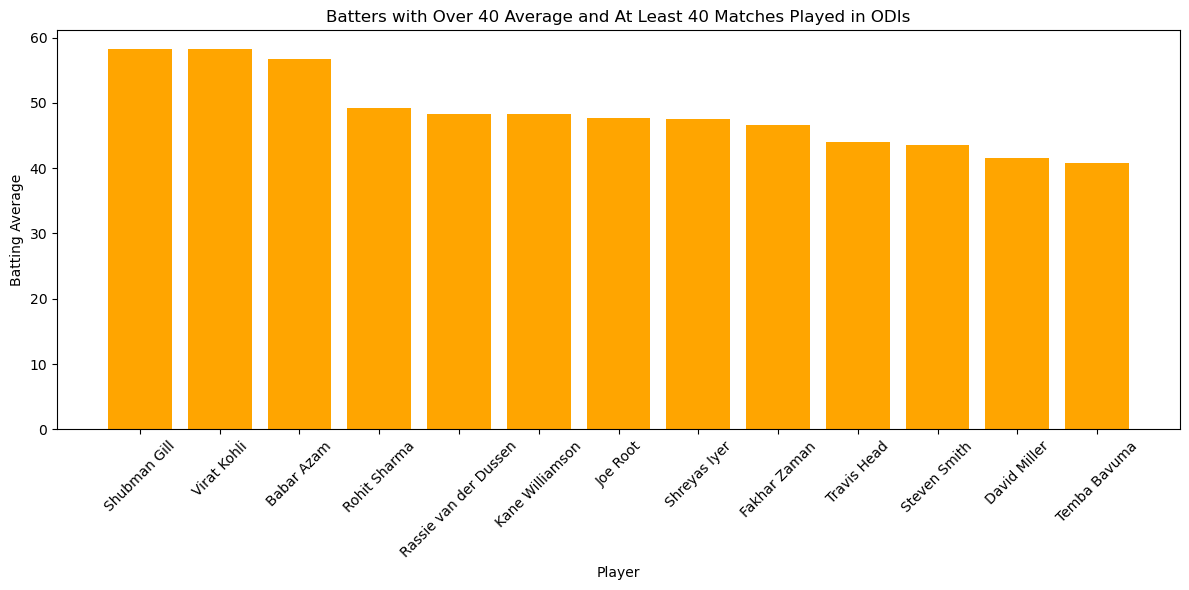

In [103]:
batters_withaverage_above40_altleast40matches = player_stats[(player_stats['Role'] == 'Batter') & 
                                          (player_stats['Bat_Average'] > 40) & 
                                          (player_stats['Matches_played'] >= 40)]

# Sort the data by batting average for better visualization
batters_withaverage_above40_altleast40matches = batters_withaverage_above40_altleast40matches.sort_values(by='Bat_Average', ascending=False)

# Create a bar chart for these batters
plt.figure(figsize=(12, 6))
plt.bar(batters_withaverage_above40_altleast40matches['Player'], batters_withaverage_above40_altleast40matches['Bat_Average'], color='orange')
plt.xlabel('Player')
plt.ylabel('Batting Average')
plt.title('Batters with Over 40 Average and At Least 40 Matches Played in ODIs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

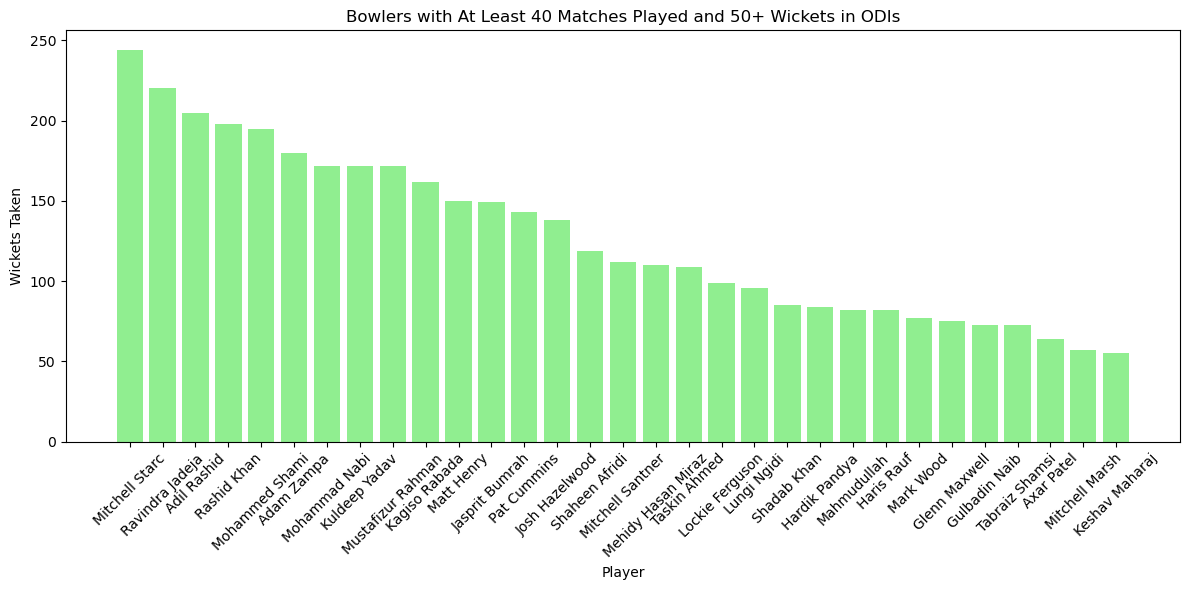

In [104]:
bowlers_with_40matches_50wickets = player_stats[(player_stats['Role'].isin(['Bowler', 'All-Rounder'])) & 
                                           (player_stats['Matches_played'] >= 40) & 
                                           (player_stats['Wickets_taken'] >= 50)]

# Sort the data by wickets taken for better visualization
bowlers_with_40matches_50wickets = bowlers_with_40matches_50wickets.sort_values(by='Wickets_taken', ascending=False)

# Create a bar chart for these bowlers
plt.figure(figsize=(12, 6))
plt.bar(bowlers_with_40matches_50wickets['Player'], bowlers_with_40matches_50wickets['Wickets_taken'], color='lightgreen')
plt.xlabel('Player')
plt.ylabel('Wickets Taken')
plt.title('Bowlers with At Least 40 Matches Played and 50+ Wickets in ODIs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

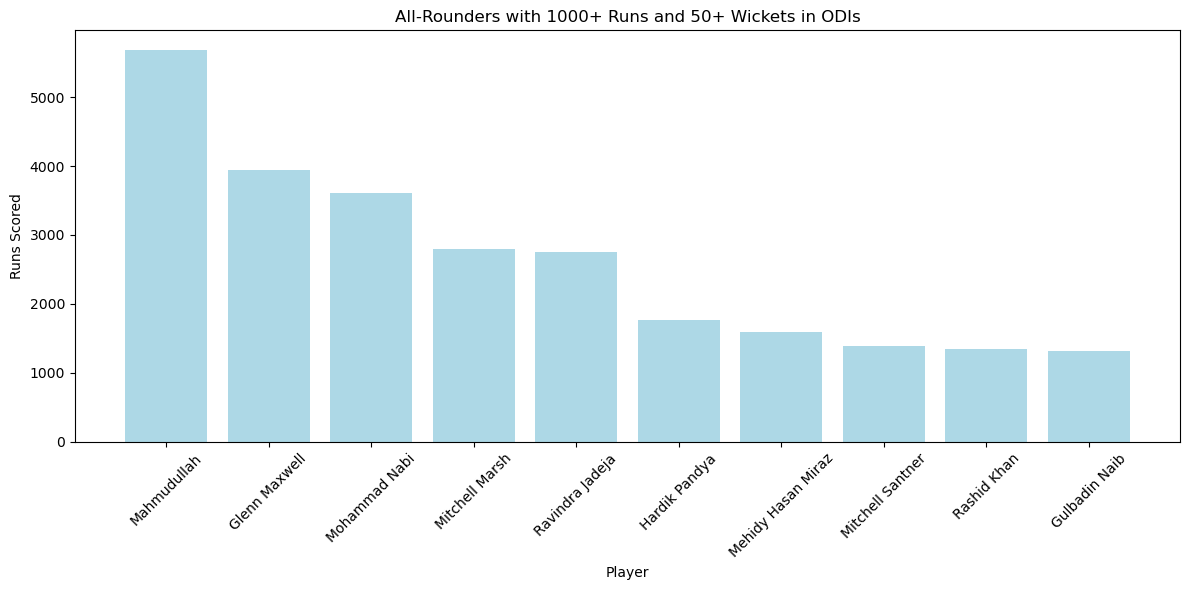

In [105]:
# Filter to include only all-rounders who have scored at least 1000 runs and have taken at least 50 wickets in ODIs
all_rounders_with_1000runs_50wickets = player_stats[(player_stats['Role'] == 'All-Rounder') & 
                                                (player_stats['Runs_scored'] >= 1000) & 
                                                (player_stats['Wickets_taken'] >= 50)]

# Sort the data by runs scored for better visualization
all_rounders_with_1000runs_50wickets = all_rounders_with_1000runs_50wickets.sort_values(by='Runs_scored', ascending=False)

# Create a bar chart for these all-rounders
plt.figure(figsize=(12, 6))
plt.bar(all_rounders_with_1000runs_50wickets['Player'], all_rounders_with_1000runs_50wickets['Runs_scored'], color='lightblue')
plt.xlabel('Player')
plt.ylabel('Runs Scored')
plt.title('All-Rounders with 1000+ Runs and 50+ Wickets in ODIs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

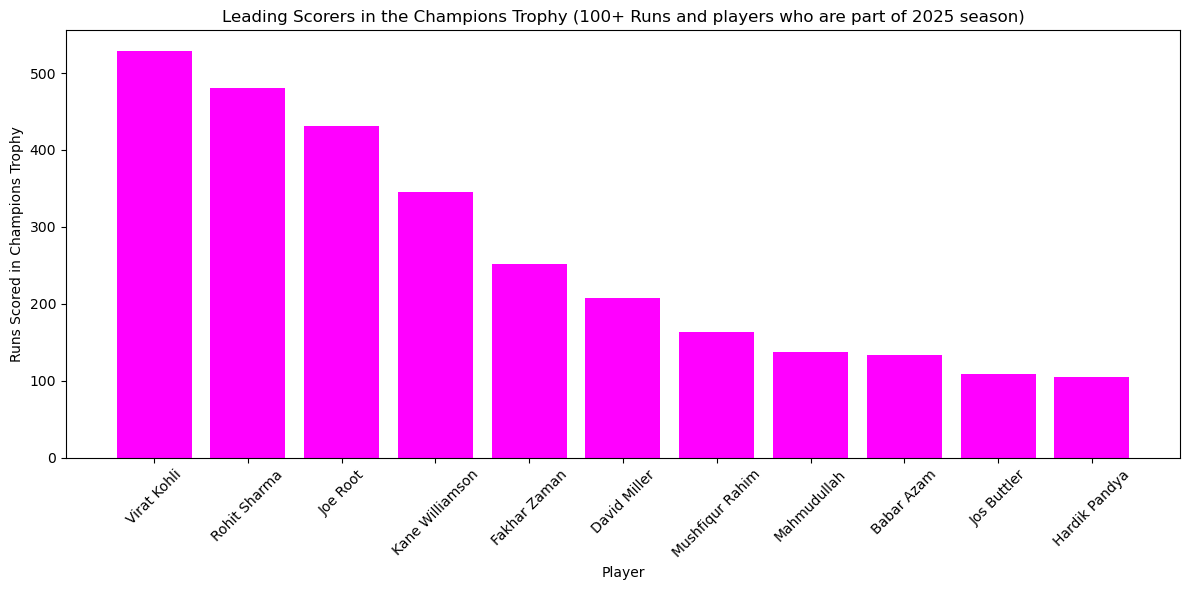

In [106]:
# Filter the players data to include those who have scored at least 100 runs in the Champions Trophy
leading_runscorers_champions_trophy = player_stats[player_stats['ChampionsTrophy_Runs'] >= 100]

# Sort the data by Champions Trophy runs for better visualization
leading_runscorers_champions_trophy_sorted = leading_runscorers_champions_trophy.sort_values(by='ChampionsTrophy_Runs', ascending=False)

# Create a bar chart for the leading scorers in the Champions Trophy
plt.figure(figsize=(12, 6))
plt.bar(leading_runscorers_champions_trophy_sorted['Player'], leading_runscorers_champions_trophy_sorted['ChampionsTrophy_Runs'], color='magenta')
plt.xlabel('Player')
plt.ylabel('Runs Scored in Champions Trophy')
plt.title('Leading Scorers in the Champions Trophy (100+ Runs and players who are part of 2025 season)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

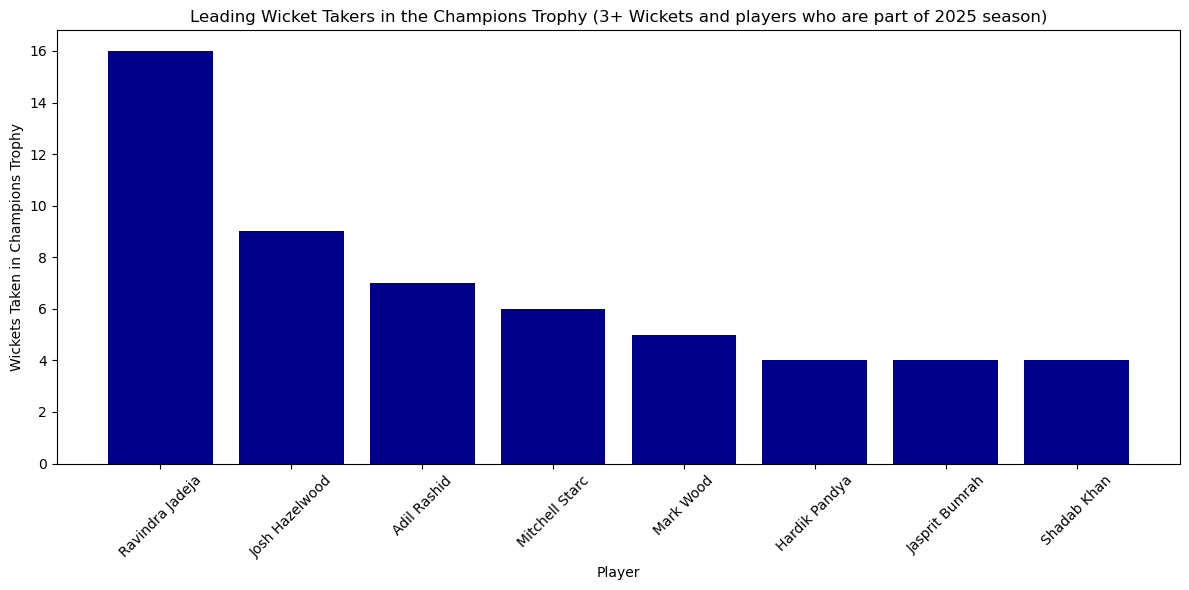

In [107]:
# Filter the players data to include those who have taken at least 3 wickets in the Champions Trophy
leading_wicket_takers_of_champions_trophy = player_stats[player_stats['ChampionsTrophy_Wickets'] >= 3]

# Sort the data by Champions Trophy wickets for better visualization
leading_wicket_takers_of_champions_trophy_sorted = leading_wicket_takers_of_champions_trophy.sort_values(by='ChampionsTrophy_Wickets', ascending=False)

# Create a bar chart for the leading wicket takers in the Champions Trophy
plt.figure(figsize=(12, 6))
plt.bar(leading_wicket_takers_of_champions_trophy_sorted['Player'], leading_wicket_takers_of_champions_trophy_sorted['ChampionsTrophy_Wickets'], color='darkblue')
plt.xlabel('Player')
plt.ylabel('Wickets Taken in Champions Trophy')
plt.title('Leading Wicket Takers in the Champions Trophy (3+ Wickets and players who are part of 2025 season)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

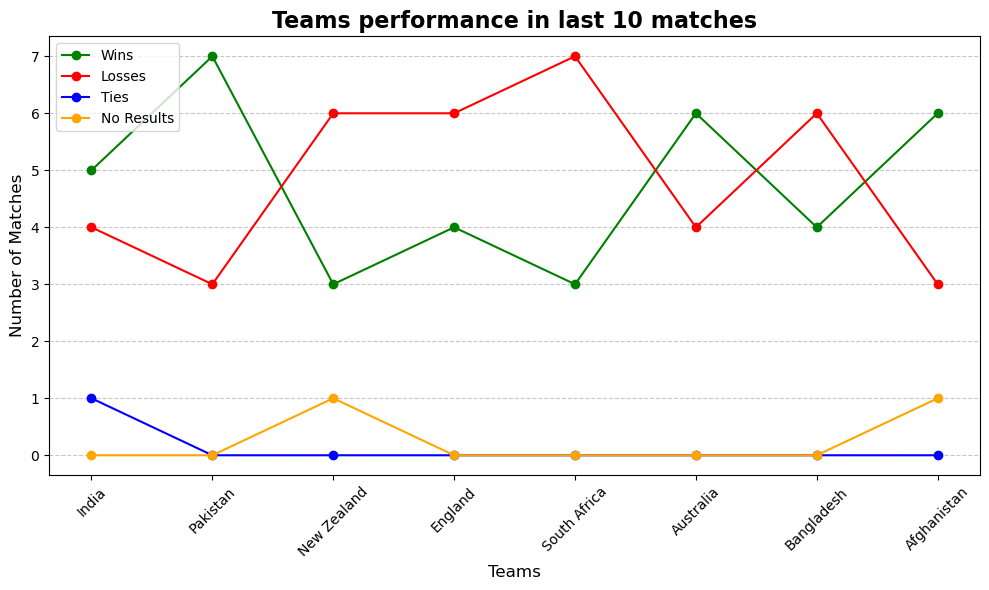

In [141]:
# Visualizing the performance of last 10 Odi played by teams
teams = last_10_stats['Team']
wins = last_10_stats['Wins']
losses = last_10_stats['Losses']
ties = last_10_stats['Ties']
no_results = last_10_stats['No Result']
# Line plot for performance trends
plt.figure(figsize=(10,6))
plt.plot(teams, wins, marker='o', linestyle='-', color='green', label='Wins')
plt.plot(teams, losses, marker='o', linestyle='-', color='red', label='Losses')
plt.plot(teams, ties, marker='o', linestyle='-', color='blue', label='Ties')
plt.plot(teams, no_results, marker='o', linestyle='-', color='orange', label='No Results')
plt.title('Teams performance in last 10 matches', fontsize=16, fontweight='bold')
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [109]:
# Removing rows with 'Match abandoned' and 'No result' from the 'results' DataFrame."
r.drop(r[(r['Winner'] == 'Matchabandoned' )].index, inplace=True)
r.drop(r[(r['Winner'] == 'Noresult' )].index, inplace=True)
r

,Date,Team_A,Team_B,Winner,Margin,Venue
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,wonby79runs,ShereBanglaNationalStadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,wonby7wickets,ShereBanglaNationalStadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,wonby8wickets,ShereBanglaNationalStadium
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,wonby41runs,GaddafiStadium
5,29/05/2015,Pakistan,Zimbabwe,Pakistan,wonby6wickets,GaddafiStadium
...,...,...,...,...,...,...
861,19/12/2024,Zimbabwe,Afghanistan,Afghanistan,wonby232runs,HarareSportsClub
862,21/12/2024,Zimbabwe,Afghanistan,Afghanistan,wonby8wickets,HarareSportsClub
863,22/12/2024,South Africa,Pakistan,Pakistan,wonby36runs,WanderersStadium
864,09/02/2024\t,SriLanka,Afghanistan,SriLanka,wonby42runs,PallekeleInternationalCricketStadium


In [110]:
# Define the list of ICC Champions Trophy teams
ct_teams = [
    'England', 'South Africa', 'Pakistan', 'New Zealand',
    'Afghanistan', 'Australia', 'Bangladesh', 'India'
]

# Filter matches involving only teams in the 'ct_teams' list
df_teams_1 = r[r['Team_A'].isin(ct_teams)]  # Matches where Team_A is in 'ct_teams'
df_teams_2 = r[r['Team_B'].isin(ct_teams)]  # Matches where Team_B is in 'ct_teams'

# Combine the filtered dataframes
df_teams = pd.concat((df_teams_1, df_teams_2))  # Concatenate the two dataframes vertically

# Remove duplicate rows if any
df_teams = df_teams.drop_duplicates()

# Count the number of rows in the filtered dataframe
df_teams_count = df_teams.count()
df_teams_count


Date      756
Team_A    756
Team_B    756
Winner    756
Margin    756
Venue     756
dtype: int64

In [111]:
df_teams


,Date,Team_A,Team_B,Winner,Margin,Venue
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,wonby79runs,ShereBanglaNationalStadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,wonby7wickets,ShereBanglaNationalStadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,wonby8wickets,ShereBanglaNationalStadium
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,wonby41runs,GaddafiStadium
5,29/05/2015,Pakistan,Zimbabwe,Pakistan,wonby6wickets,GaddafiStadium
...,...,...,...,...,...,...
857,12/12/2024,WestIndies,Bangladesh,WestIndies,wonby4wickets,WarnerPark
861,19/12/2024,Zimbabwe,Afghanistan,Afghanistan,wonby232runs,HarareSportsClub
862,21/12/2024,Zimbabwe,Afghanistan,Afghanistan,wonby8wickets,HarareSportsClub
864,09/02/2024\t,SriLanka,Afghanistan,SriLanka,wonby42runs,PallekeleInternationalCricketStadium


In [112]:
# Removing unnecessary columns from df_teams and displaying the first few rows of the updated dataframe.
df_teams_2025 = df_teams.drop(['Date','Margin', 'Venue'], axis=1)
df_teams_2025.head()

,Team_A,Team_B,Winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
4,Pakistan,Zimbabwe,Pakistan
5,Pakistan,Zimbabwe,Pakistan


In [113]:
df_teams_2025

,Team_A,Team_B,Winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
4,Pakistan,Zimbabwe,Pakistan
5,Pakistan,Zimbabwe,Pakistan
...,...,...,...
857,WestIndies,Bangladesh,WestIndies
861,Zimbabwe,Afghanistan,Afghanistan
862,Zimbabwe,Afghanistan,Afghanistan
864,SriLanka,Afghanistan,SriLanka


In [114]:
# Reset the index of df_teams_2019 while dropping the old index.
df_teams_2025 = df_teams_2025.reset_index(drop=True)

# Set a value of 1 in the 'winning_team' column for rows where the 'Winner' column is the same as the 'Team_1' column.
df_teams_2025.loc[df_teams_2025.Winner == df_teams_2025.Team_A,'winning_team']=1

# Set a value of 2 in the 'winning_team' column for rows where the 'Winner' column is the same as the 'Team_2' column.
df_teams_2025.loc[df_teams_2025.Winner == df_teams_2025.Team_B, 'winning_team']=2

# Drop the 'winning_team' column from the DataFrame.
df_teams_2025 = df_teams_2025.drop(['winning_team'], axis=1)

# Display the first few rows of the modified DataFrame using df_teams_2019.head().
df_teams_2025.head()

,Team_A,Team_B,Winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
3,Pakistan,Zimbabwe,Pakistan
4,Pakistan,Zimbabwe,Pakistan


In [115]:
# Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Creating dummy variables for team names
final = pd.get_dummies(df_teams_2025, prefix=['Team_A', 'Team_B'], columns=['Team_A', 'Team_B'])

X = final.drop(['Winner'], axis=1)  # Extracting features by dropping the 'Winner' column
y = final["Winner"]  # Assigning the 'Winner' column as the target variable

# Split the data into training and testing sets using a test size of 20% and a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
final.head()

,Winner,Team_A_Afghanistan,Team_A_Australia,Team_A_Bangladesh,Team_A_England,Team_A_HongKong,Team_A_India,Team_A_Ireland,Team_A_Netherlands,Team_A_New Zealand,...,Team_B_Nepal,Team_B_Netherlands,Team_B_New Zealand,Team_B_Pakistan,Team_B_Scotland,Team_B_South Africa,Team_B_SriLanka,Team_B_UnitedArabEmirates,Team_B_WestIndies,Team_B_Zimbabwe
0,Bangladesh,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,Bangladesh,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,Bangladesh,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Pakistan,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Pakistan,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [116]:
# Import the Random forest module from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create an Random forest classifier with a linear kernel
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
pred = rf.predict(X_test)

# Calculating training set score:
score = rf.score(X_train, y_train)

# Calculating test set score:
score2 = rf.score(X_test, y_test)

# Printing the training set accuracy with 3 decimal places
print("Training set accuracy: ", '%.3f'%(score))

# Printing the test set accuracy with 3 decimal places
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.743
Test set accuracy:  0.691


In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.733
Test set accuracy:  0.691


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Filter training and test datasets to include only Champions Trophy teams
X_train_ct = X_train[y_train.isin(ct_teams)]
y_train_ct = y_train[y_train.isin(ct_teams)]
X_test_ct = X_test[y_test.isin(ct_teams)]
y_test_ct = y_test[y_test.isin(ct_teams)]

# Train a Random Forest model on the filtered dataset
rf_ct = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
rf_ct.fit(X_train_ct, y_train_ct)

# Evaluate the model on the filtered test set
ct_model_accuracy = rf_ct.score(X_test_ct, y_test_ct)

# Generate a classification report for the filtered model
ct_predictions = rf_ct.predict(X_test_ct)
ct_classification_report = classification_report(y_test_ct, ct_predictions)

# Output results
print("Accuracy with Champions trophy playing teams: ", '%.3f'%(ct_model_accuracy))

Accuracy with Champions trophy playing teams:  0.774


In [119]:
print(ct_classification_report)

              precision    recall  f1-score   support

 Afghanistan       1.00      0.92      0.96        13
   Australia       0.70      0.50      0.58        14
  Bangladesh       0.88      0.93      0.90        15
     England       0.59      0.68      0.63        19
       India       0.76      0.96      0.85        27
 New Zealand       0.73      0.62      0.67        13
    Pakistan       0.79      0.79      0.79        14
South Africa       0.86      0.67      0.75        18

    accuracy                           0.77       133
   macro avg       0.79      0.76      0.77       133
weighted avg       0.78      0.77      0.77       133



In [120]:
# Step 2: Balance the Training Data using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensure that all features are numeric
X_train_ct_numeric = X_train_ct.astype(float)

# Apply SMOTE to the filtered Champions Trophy training dataset
smote = SMOTE(random_state=42, k_neighbors=2)
X_balanced_ct, y_balanced_ct = smote.fit_resample(X_train_ct_numeric, y_train_ct)

# Train the Random Forest model on the balanced dataset
rf_balanced_ct = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
rf_balanced_ct.fit(X_balanced_ct, y_balanced_ct)

# Evaluate the model on the Champions Trophy test set
balanced_ct_model_accuracy = rf_balanced_ct.score(X_test_ct, y_test_ct)

# Generate a classification report
ct_balanced_predictions = rf_balanced_ct.predict(X_test_ct)
ct_balanced_classification_report = classification_report(y_test_ct, ct_balanced_predictions)

# Output results
print("Balanced Model Accuracy with SMOTE: {:.3f}\n".format(balanced_ct_model_accuracy))
print("Classification Report:")
print(ct_balanced_classification_report)


Balanced Model Accuracy with SMOTE: 0.752

Classification Report:
              precision    recall  f1-score   support

 Afghanistan       1.00      0.92      0.96        13
   Australia       0.70      0.50      0.58        14
  Bangladesh       0.87      0.87      0.87        15
     England       0.59      0.68      0.63        19
       India       0.75      0.89      0.81        27
 New Zealand       0.73      0.62      0.67        13
    Pakistan       0.79      0.79      0.79        14
South Africa       0.71      0.67      0.69        18

    accuracy                           0.75       133
   macro avg       0.77      0.74      0.75       133
weighted avg       0.76      0.75      0.75       133



In [121]:
# Perform the merge  with corrected file and "Team_ranking" column
schedule["Team_A_ODI_ranking"] = schedule["Team_A"].map(
    icc_rankings.set_index("Team_name")["Team_ranking"]
)
schedule["Team_B_ODI_ranking"] = schedule["Team_B"].map(
    icc_rankings.set_index("Team_name")["Team_ranking"]
)
schedule


,Match_num,Team_A,Team_B,Group,Venue,Date,Team_A_ODI_ranking,Team_B_ODI_ranking
0,Match_1,Pakistan,New Zealand,A,"National Stadium, Karachi",19/02/2025,3,5
1,Match_2,India,Bangladesh,A,"Dubai International Cricket Stadium, Dubai",20/02/2025,1,9
2,Match_3,Afghanistan,South Africa,B,"National Stadium, Karachi",21/02/2025,8,4
3,Match_4,Australia,England,B,"Gaddafi Stadium, Lahore",22/02/2025,2,7
4,Match_5,Pakistan,India,A,"Dubai International Cricket Stadium, Dubai",23/02/2025,3,1
5,Match_6,Bangladesh,New Zealand,A,"Rawalpindi Cricket Stadium, Rawalpindi",24/02/2025,9,5
6,Match_7,Australia,South Africa,B,"Rawalpindi Cricket Stadium, Rawalpindi",25/02/2025,2,4
7,Match_8,Afghanistan,England,B,"Gaddafi Stadium, Lahore",26/02/2025,8,7
8,Match_9,Pakistan,Bangladesh,A,"Rawalpindi Cricket Stadium, Rawalpindi",27/02/2025,3,9
9,Match_10,Afghanistan,Australia,B,"Gaddafi Stadium, Lahore",28/02/2025,8,2


In [122]:


# Map last 10 match stats for Team_A
schedule = schedule.merge(
    last_10_stats[["Team", "Wins", "Losses"]],
    left_on="Team_A",
    right_on="Team",
    how="left",
    suffixes=("", "_Team_A"),
)
schedule.rename(
    columns={"Wins": "Team_A_wins_inlast_tenmatches", "Losses": "Team_A_losses_inlast_tenmatches"},
    inplace=True,
)
schedule.drop(columns=["Team"], inplace=True)

# Map last 10 match stats for Team_B
schedule = schedule.merge(
    last_10_stats[["Team", "Wins", "Losses"]],
    left_on="Team_B",
    right_on="Team",
    how="left",
    suffixes=("", "_Team_B"),
)
schedule.rename(
    columns={"Wins": "Team_B_wins_inlast_tenmatches", "Losses": "Team_B_losses_inlast_tenmatches"},
    inplace=True,
)
schedule.drop(columns=["Team"], inplace=True)
schedule

,Match_num,Team_A,Team_B,Group,Venue,Date,Team_A_ODI_ranking,Team_B_ODI_ranking,Team_A_wins_inlast_tenmatches,Team_A_losses_inlast_tenmatches,Team_B_wins_inlast_tenmatches,Team_B_losses_inlast_tenmatches
0,Match_1,Pakistan,New Zealand,A,"National Stadium, Karachi",19/02/2025,3,5,7,3,3,6
1,Match_2,India,Bangladesh,A,"Dubai International Cricket Stadium, Dubai",20/02/2025,1,9,5,4,4,6
2,Match_3,Afghanistan,South Africa,B,"National Stadium, Karachi",21/02/2025,8,4,6,3,3,7
3,Match_4,Australia,England,B,"Gaddafi Stadium, Lahore",22/02/2025,2,7,6,4,4,6
4,Match_5,Pakistan,India,A,"Dubai International Cricket Stadium, Dubai",23/02/2025,3,1,7,3,5,4
5,Match_6,Bangladesh,New Zealand,A,"Rawalpindi Cricket Stadium, Rawalpindi",24/02/2025,9,5,4,6,3,6
6,Match_7,Australia,South Africa,B,"Rawalpindi Cricket Stadium, Rawalpindi",25/02/2025,2,4,6,4,3,7
7,Match_8,Afghanistan,England,B,"Gaddafi Stadium, Lahore",26/02/2025,8,7,6,3,4,6
8,Match_9,Pakistan,Bangladesh,A,"Rawalpindi Cricket Stadium, Rawalpindi",27/02/2025,3,9,7,3,4,6
9,Match_10,Afghanistan,Australia,B,"Gaddafi Stadium, Lahore",28/02/2025,8,2,6,3,6,4


In [123]:
schedule["Team_A_wins_inChampionsTrophy"] = schedule["Team_A"].map(
    team_stats.set_index("Team")["Wins"]
)
schedule["Team_A_losses_inChampionsTrophy"] = schedule["Team_A"].map(
    team_stats.set_index("Team")["Losses"]
)
schedule["Team_B_wins_inChampionsTrophy"] = schedule["Team_B"].map(
    team_stats.set_index("Team")["Wins"]
)
schedule["Team_B_losses_inChampionsTrophy"] = schedule["Team_B"].map(
    team_stats.set_index("Team")["Losses"]
)
schedule

,Match_num,Team_A,Team_B,Group,Venue,Date,Team_A_ODI_ranking,Team_B_ODI_ranking,Team_A_wins_inlast_tenmatches,Team_A_losses_inlast_tenmatches,Team_B_wins_inlast_tenmatches,Team_B_losses_inlast_tenmatches,Team_A_wins_inChampionsTrophy,Team_A_losses_inChampionsTrophy,Team_B_wins_inChampionsTrophy,Team_B_losses_inChampionsTrophy
0,Match_1,Pakistan,New Zealand,A,"National Stadium, Karachi",19/02/2025,3,5,7,3,3,6,11,12,12,10
1,Match_2,India,Bangladesh,A,"Dubai International Cricket Stadium, Dubai",20/02/2025,1,9,5,4,4,6,18,8,2,9
2,Match_3,Afghanistan,South Africa,B,"National Stadium, Karachi",21/02/2025,8,4,6,3,3,7,0,0,12,11
3,Match_4,Australia,England,B,"Gaddafi Stadium, Lahore",22/02/2025,2,7,6,4,4,6,12,8,14,11
4,Match_5,Pakistan,India,A,"Dubai International Cricket Stadium, Dubai",23/02/2025,3,1,7,3,5,4,11,12,18,8
5,Match_6,Bangladesh,New Zealand,A,"Rawalpindi Cricket Stadium, Rawalpindi",24/02/2025,9,5,4,6,3,6,2,9,12,10
6,Match_7,Australia,South Africa,B,"Rawalpindi Cricket Stadium, Rawalpindi",25/02/2025,2,4,6,4,3,7,12,8,12,11
7,Match_8,Afghanistan,England,B,"Gaddafi Stadium, Lahore",26/02/2025,8,7,6,3,4,6,0,0,14,11
8,Match_9,Pakistan,Bangladesh,A,"Rawalpindi Cricket Stadium, Rawalpindi",27/02/2025,3,9,7,3,4,6,11,12,2,9
9,Match_10,Afghanistan,Australia,B,"Gaddafi Stadium, Lahore",28/02/2025,8,2,6,3,6,4,0,0,12,8


In [124]:

# Aggregate runs and wickets at the team level
team_stats_from_players = player_stats.groupby("Team").agg(
    ChampionsTrophy_Runs=("ChampionsTrophy_Runs", "sum"),
    ChampionsTrophy_Wickets=("ChampionsTrophy_Wickets", "sum")
).reset_index()

# Map aggregated stats to Team_A and Team_B
schedule["Team_A_total_runs_inChampionsTrophy"] = schedule["Team_A"].map(
    team_stats_from_players.set_index("Team")["ChampionsTrophy_Runs"]
)
schedule["Team_A_total_wickets_inChampionsTrophy"] = schedule["Team_A"].map(
    team_stats_from_players.set_index("Team")["ChampionsTrophy_Wickets"]
)
schedule["Team_B_total_runs_inChampionsTrophy"] = schedule["Team_B"].map(
    team_stats_from_players.set_index("Team")["ChampionsTrophy_Runs"]
)
schedule["Team_B_total_wickets_inChampionsTrophy"] = schedule["Team_B"].map(
    team_stats_from_players.set_index("Team")["ChampionsTrophy_Wickets"]
)
schedule

,Match_num,Team_A,Team_B,Group,Venue,Date,Team_A_ODI_ranking,Team_B_ODI_ranking,Team_A_wins_inlast_tenmatches,Team_A_losses_inlast_tenmatches,Team_B_wins_inlast_tenmatches,Team_B_losses_inlast_tenmatches,Team_A_wins_inChampionsTrophy,Team_A_losses_inChampionsTrophy,Team_B_wins_inChampionsTrophy,Team_B_losses_inChampionsTrophy,Team_A_total_runs_inChampionsTrophy,Team_A_total_wickets_inChampionsTrophy,Team_B_total_runs_inChampionsTrophy,Team_B_total_wickets_inChampionsTrophy
0,Match_1,Pakistan,New Zealand,A,"National Stadium, Karachi",19/02/2025,3,5,7,3,3,6,11,12,12,10,399,4,370,2
1,Match_2,India,Bangladesh,A,"Dubai International Cricket Stadium, Dubai",20/02/2025,1,9,5,4,4,6,18,8,2,9,1211,24,359,3
2,Match_3,Afghanistan,South Africa,B,"National Stadium, Karachi",21/02/2025,8,4,6,3,3,7,0,0,12,11,0,0,238,1
3,Match_4,Australia,England,B,"Gaddafi Stadium, Lahore",22/02/2025,2,7,6,4,4,6,12,8,14,11,279,20,562,13
4,Match_5,Pakistan,India,A,"Dubai International Cricket Stadium, Dubai",23/02/2025,3,1,7,3,5,4,11,12,18,8,399,4,1211,24
5,Match_6,Bangladesh,New Zealand,A,"Rawalpindi Cricket Stadium, Rawalpindi",24/02/2025,9,5,4,6,3,6,2,9,12,10,359,3,370,2
6,Match_7,Australia,South Africa,B,"Rawalpindi Cricket Stadium, Rawalpindi",25/02/2025,2,4,6,4,3,7,12,8,12,11,279,20,238,1
7,Match_8,Afghanistan,England,B,"Gaddafi Stadium, Lahore",26/02/2025,8,7,6,3,4,6,0,0,14,11,0,0,562,13
8,Match_9,Pakistan,Bangladesh,A,"Rawalpindi Cricket Stadium, Rawalpindi",27/02/2025,3,9,7,3,4,6,11,12,2,9,399,4,359,3
9,Match_10,Afghanistan,Australia,B,"Gaddafi Stadium, Lahore",28/02/2025,8,2,6,3,6,4,0,0,12,8,0,0,279,20


In [125]:
# Aggregate overall ODI stats at the team level from the player stats dataset
team_odi_stats_from_players = player_stats.groupby("Team").agg(
    ODI_Runs=("Runs_scored", "sum"),
    ODI_Wickets=("Wickets_taken", "sum")
).reset_index()

# Map aggregated ODI stats to Team_A and Team_B
schedule["Team_A_total_runs_inODIs"] = schedule["Team_A"].map(
    team_odi_stats_from_players.set_index("Team")["ODI_Runs"]
)
schedule["Team_A_total_wickets_inODIs"] = schedule["Team_A"].map(
    team_odi_stats_from_players.set_index("Team")["ODI_Wickets"]
)
schedule["Team_B_total_runs_inODIs"] = schedule["Team_B"].map(
    team_odi_stats_from_players.set_index("Team")["ODI_Runs"]
)
schedule["Team_B_total_wickets_inODIs"] = schedule["Team_B"].map(
    team_odi_stats_from_players.set_index("Team")["ODI_Wickets"]
)
schedule

,Match_num,Team_A,Team_B,Group,Venue,Date,Team_A_ODI_ranking,Team_B_ODI_ranking,Team_A_wins_inlast_tenmatches,Team_A_losses_inlast_tenmatches,...,Team_B_wins_inChampionsTrophy,Team_B_losses_inChampionsTrophy,Team_A_total_runs_inChampionsTrophy,Team_A_total_wickets_inChampionsTrophy,Team_B_total_runs_inChampionsTrophy,Team_B_total_wickets_inChampionsTrophy,Team_A_total_runs_inODIs,Team_A_total_wickets_inODIs,Team_B_total_runs_inODIs,Team_B_total_wickets_inODIs
0,Match_1,Pakistan,New Zealand,A,"National Stadium, Karachi",19/02/2025,3,5,7,3,...,12,10,399,4,370,2,15150,377,20086,476
1,Match_2,India,Bangladesh,A,"Dubai International Cricket Stadium, Dubai",20/02/2025,1,9,5,4,...,2,9,1211,24,359,3,39204,933,20876,528
2,Match_3,Afghanistan,South Africa,B,"National Stadium, Karachi",21/02/2025,8,4,6,3,...,12,11,0,0,238,1,17385,596,15222,498
3,Match_4,Australia,England,B,"Gaddafi Stadium, Lahore",22/02/2025,2,7,6,4,...,14,11,279,20,562,13,22787,961,16422,430
4,Match_5,Pakistan,India,A,"Dubai International Cricket Stadium, Dubai",23/02/2025,3,1,7,3,...,18,8,399,4,1211,24,15150,377,39204,933
5,Match_6,Bangladesh,New Zealand,A,"Rawalpindi Cricket Stadium, Rawalpindi",24/02/2025,9,5,4,6,...,12,10,359,3,370,2,20876,528,20086,476
6,Match_7,Australia,South Africa,B,"Rawalpindi Cricket Stadium, Rawalpindi",25/02/2025,2,4,6,4,...,12,11,279,20,238,1,22787,961,15222,498
7,Match_8,Afghanistan,England,B,"Gaddafi Stadium, Lahore",26/02/2025,8,7,6,3,...,14,11,0,0,562,13,17385,596,16422,430
8,Match_9,Pakistan,Bangladesh,A,"Rawalpindi Cricket Stadium, Rawalpindi",27/02/2025,3,9,7,3,...,2,9,399,4,359,3,15150,377,20876,528
9,Match_10,Afghanistan,Australia,B,"Gaddafi Stadium, Lahore",28/02/2025,8,2,6,3,...,12,8,0,0,279,20,17385,596,22787,961


In [126]:
pred_set = []

In [127]:
# Loop to add teams to a new prediction dataset based on multiple features
for index, row in schedule.iterrows():
    # Calculate scores for Team_A and Team_B based on multiple features
    score_A = (
        row['Team_A_ODI_ranking'] * -1 +  # Lower rank is better
        row['Team_A_wins_inlast_tenmatches'] * 2 +
        row['Team_A_total_runs_inChampionsTrophy'] * 0.01 +
        row['Team_A_total_wickets_inChampionsTrophy'] * 0.05 +
        row['Team_A_total_runs_inODIs'] * 0.001
    )
    score_B = (
        row['Team_B_ODI_ranking'] * -1 +  # Lower rank is better
        row['Team_B_wins_inlast_tenmatches'] * 2 +
        row['Team_B_total_runs_inChampionsTrophy'] * 0.01 +
        row['Team_B_total_wickets_inChampionsTrophy'] * 0.05 +
        row['Team_B_total_runs_inODIs'] * 0.001
    )
    
    # Append rows to pred_set but leave 'winning_team' unpopulated (None or NaN)
    pred_set.append({'Team_A': row['Team_A'], 'Team_B': row['Team_B'], 'winning_team': None})

# Convert the prediction set into a DataFrame
pred_set = pd.DataFrame(pred_set)

# Backup the original prediction set for reference
backup_pred_set = pred_set

# Display the first few rows of the updated prediction set
pred_set.head()


,Team_A,Team_B,winning_team
0,Pakistan,New Zealand,None
1,India,Bangladesh,None
2,Afghanistan,South Africa,None
3,Australia,England,None
4,Pakistan,India,None


In [128]:
# Transforming the dataset using one-hot encoding for 'Team_1' and 'Team_2' columns.
pred_set = pd.get_dummies(pred_set, prefix=['Team_A', 'Team_B'], columns=['Team_A', 'Team_B'])

# Finding missing columns in the final dataset compared to the transformed 'pred_set'.
missing_cols = set(final.columns) - set(pred_set.columns)

# Setting the missing columns in "pred_set" DataFrame to 0 and then keeps only the columns present in the "final" DataFrame.
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Dropping the 'Winner' column from pred_set.
pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_A_Afghanistan,Team_A_Australia,Team_A_Bangladesh,Team_A_England,Team_A_HongKong,Team_A_India,Team_A_Ireland,Team_A_Netherlands,Team_A_New Zealand,Team_A_Pakistan,...,Team_B_Nepal,Team_B_Netherlands,Team_B_New Zealand,Team_B_Pakistan,Team_B_Scotland,Team_B_South Africa,Team_B_SriLanka,Team_B_UnitedArabEmirates,Team_B_WestIndies,Team_B_Zimbabwe
0,False,False,False,0,0,False,0,0,False,True,...,0,0,True,0,0,False,0,0,0,0
1,False,False,False,0,0,True,0,0,False,False,...,0,0,False,0,0,False,0,0,0,0
2,True,False,False,0,0,False,0,0,False,False,...,0,0,False,0,0,True,0,0,0,0
3,False,True,False,0,0,False,0,0,False,False,...,0,0,False,0,0,False,0,0,0,0
4,False,False,False,0,0,False,0,0,False,True,...,0,0,False,0,0,False,0,0,0,0


In [129]:
# Making predictions using the trained Random Forest model (rf) on the pred_set
predictions = rf_balanced_ct.predict(pred_set)

# Adding predictions as a new column in the schedule DataFrame
schedule["Predicted_Winner"] = predictions

# Printing the winners for each fixture based on the predictions
print("Predicted Match Outcomes:\n")
for i in range(schedule.shape[0]):
    print(f"{schedule.iloc[i]['Team_A']} vs {schedule.iloc[i]['Team_B']}")
    print(f"Winner: {schedule.iloc[i]['Predicted_Winner']}")
    print("")

Predicted Match Outcomes:

Pakistan vs New Zealand
Winner: Pakistan

India vs Bangladesh
Winner: India

Afghanistan vs South Africa
Winner: South Africa

Australia vs England
Winner: Australia

Pakistan vs India
Winner: India

Bangladesh vs New Zealand
Winner: New Zealand

Australia vs South Africa
Winner: South Africa

Afghanistan vs England
Winner: Afghanistan

Pakistan vs Bangladesh
Winner: Pakistan

Afghanistan vs Australia
Winner: Australia

South Africa vs England
Winner: England

New Zealand vs India
Winner: India



In [130]:
predictions

array(['Pakistan', 'India', 'South Africa', 'Australia', 'India',
       'New Zealand', 'South Africa', 'Afghanistan', 'Pakistan',
       'Australia', 'England', 'India'], dtype=object)

In [131]:
semi_final = [('India', 'England'),
            ('Pakistan', 'South Africa')]

In [132]:
def clean_and_predict(matches, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct):
    # Initialize an empty list to store the match predictions
    pred_set = []

    # Loop through the list of matches and fetch required data for each team
    for match in matches:
        # Fetch rankings from the ranking dataset
        team_1_ranking = icc_rankings.loc[icc_rankings['Team_name'] == match[0], 'Team_ranking'].iloc[0]
        team_2_ranking = icc_rankings.loc[icc_rankings['Team_name'] == match[1], 'Team_ranking'].iloc[0]

        # Fetch Champions Trophy stats
        team_1_ct_wins = team_stats.loc[team_stats['Team'] == match[0], 'Wins'].iloc[0]
        team_2_ct_wins = team_stats.loc[team_stats['Team'] == match[1], 'Wins'].iloc[0]

        # Fetch last 10 ODI stats
        team_1_last10_wins = last_10_stats.loc[last_10_stats['Team'] == match[0], 'Wins'].iloc[0]
        team_2_last10_wins = last_10_stats.loc[last_10_stats['Team'] == match[1], 'Wins'].iloc[0]

        # Decide order of teams based on ranking or other criteria
        if team_1_ranking < team_2_ranking:
            pred_set.append({
                'Team_1': match[0],
                'Team_2': match[1],
                'Team_1_ranking': team_1_ranking,
                'Team_2_ranking': team_2_ranking,
                'Team_1_ChampionsTrophy_wins': team_1_ct_wins,
                'Team_2_ChampionsTrophy_wins': team_2_ct_wins,
                'Team_1_Last10_ODI_wins': team_1_last10_wins,
                'Team_2_Last10_ODI_wins': team_2_last10_wins
            })
        else:
            pred_set.append({
                'Team_1': match[1],
                'Team_2': match[0],
                'Team_1_ranking': team_2_ranking,
                'Team_2_ranking': team_1_ranking,
                'Team_1_ChampionsTrophy_wins': team_2_ct_wins,
                'Team_2_ChampionsTrophy_wins': team_1_ct_wins,
                'Team_1_Last10_ODI_wins': team_2_last10_wins,
                'Team_2_Last10_ODI_wins': team_1_last10_wins
            })

    # Convert the pred_set list into a pandas DataFrame
    pred_set = pd.DataFrame(pred_set)

    # Make a backup of the pred_set DataFrame
    backup_pred_set = pred_set

    # Convert categorical variables in the pred_set DataFrame into dummy variables
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Identify missing columns in pred_set compared to the final DataFrame
    missing_cols2 = set(final.columns) - set(pred_set.columns)

    # Add the missing columns to the pred_set DataFrame and set their values to 0
    for c in missing_cols2:
        pred_set[c] = 0

    # Reorder pred_set columns to match the final DataFrame's order
    pred_set = pred_set[final.columns]

    # Drop the 'Winner' column from the pred_set DataFrame
    pred_set = pred_set.drop(['Winner'], axis=1)

    # Use the provided classifier (rf) to make predictions on the pred_set DataFrame
    predictions = rf_balanced_ct.predict(pred_set)

    # Loop through the pred_set DataFrame and print the match predictions and winners
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " vs " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

# Call the function with the provided arguments
clean_and_predict(semi_final, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct)


England vs India
Winner: India

South Africa vs Pakistan
Winner: Pakistan



In [133]:
# other semi final posibilities
semi_final = [('India', 'Australia'),
            ('Pakistan', 'South Africa')]
clean_and_predict(semi_final, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct)


Australia vs India
Winner: India

South Africa vs Pakistan
Winner: Pakistan



In [134]:
semi_final = [('India', 'South Africa'),
            ('Pakistan', 'England')]
clean_and_predict(semi_final, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct)

South Africa vs India
Winner: India

England vs Pakistan
Winner: Pakistan



In [135]:
finals = [('Pakistan', 'India')]
clean_and_predict(finals, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct)


Pakistan vs India
Winner: India



In [136]:
semi_final = [('India', 'England'),
            ('Pakistan', 'Australia')]
clean_and_predict(semi_final, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct)

England vs India
Winner: India

Pakistan vs Australia
Winner: Australia



In [137]:
finals = [('Australia', 'India')]
clean_and_predict(finals, icc_rankings, team_stats, last_10_stats, final, rf_balanced_ct)


Australia vs India
Winner: India

